In [1]:
import sys
from glob import glob

import time
import h5py
import zarr
import numpy as np
import pandas as pd

In [2]:
sys.path.insert(0, '/glade/u/home/ksha/NCAR/')
sys.path.insert(0, '/glade/u/home/ksha/NCAR/libs/')

from namelist import *
import data_utils as du
import graph_utils as gu

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [4]:
from datetime import datetime, timedelta
import subprocess

In [5]:
lead = 21

In [16]:
names = [
    'Max/Comp Radar',
    'MSLP',
    'AGL',
    'UH 2-5 km',
    'UH 0-2 km',
    'UH 0-3 km',
    'Vorticity 0-2 km',
    'Vorticity 0-1 km',
    'Graupel mass',
    'T 2m',
    'Dewpoint 2m',
    'U 10m',
    'V 10m',
    'SPD 10m',
    'APCP',
    'CAPE',
    'CIN',
    'SRH 0-3 km',
    'SRH 0-1 km',
    'U shear 0-1 km',
    'V shear 0-1 km',
    'U shear 0-6 km',
    'V shear 0-6 km']

name_pick = []
for i in [0, 1, 3, 4, 5, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]:
    #print(names[i])
    name_pick.append(names[i])

['Max/Comp Radar',
 'MSLP',
 'UH 2-5 km',
 'T 2m',
 'SPD 10m',
 'APCP',
 'CAPE',
 'CIN',
 'U shear 0-6 km',
 'V shear 0-6 km']

### non-tornadic storm examples

In [8]:
filenames = sorted(glob("/glade/scratch/ksha/DATA/NCAR_batch/*neg_neg_neg*lead21*.npy"))

In [9]:
len(filenames)

227157

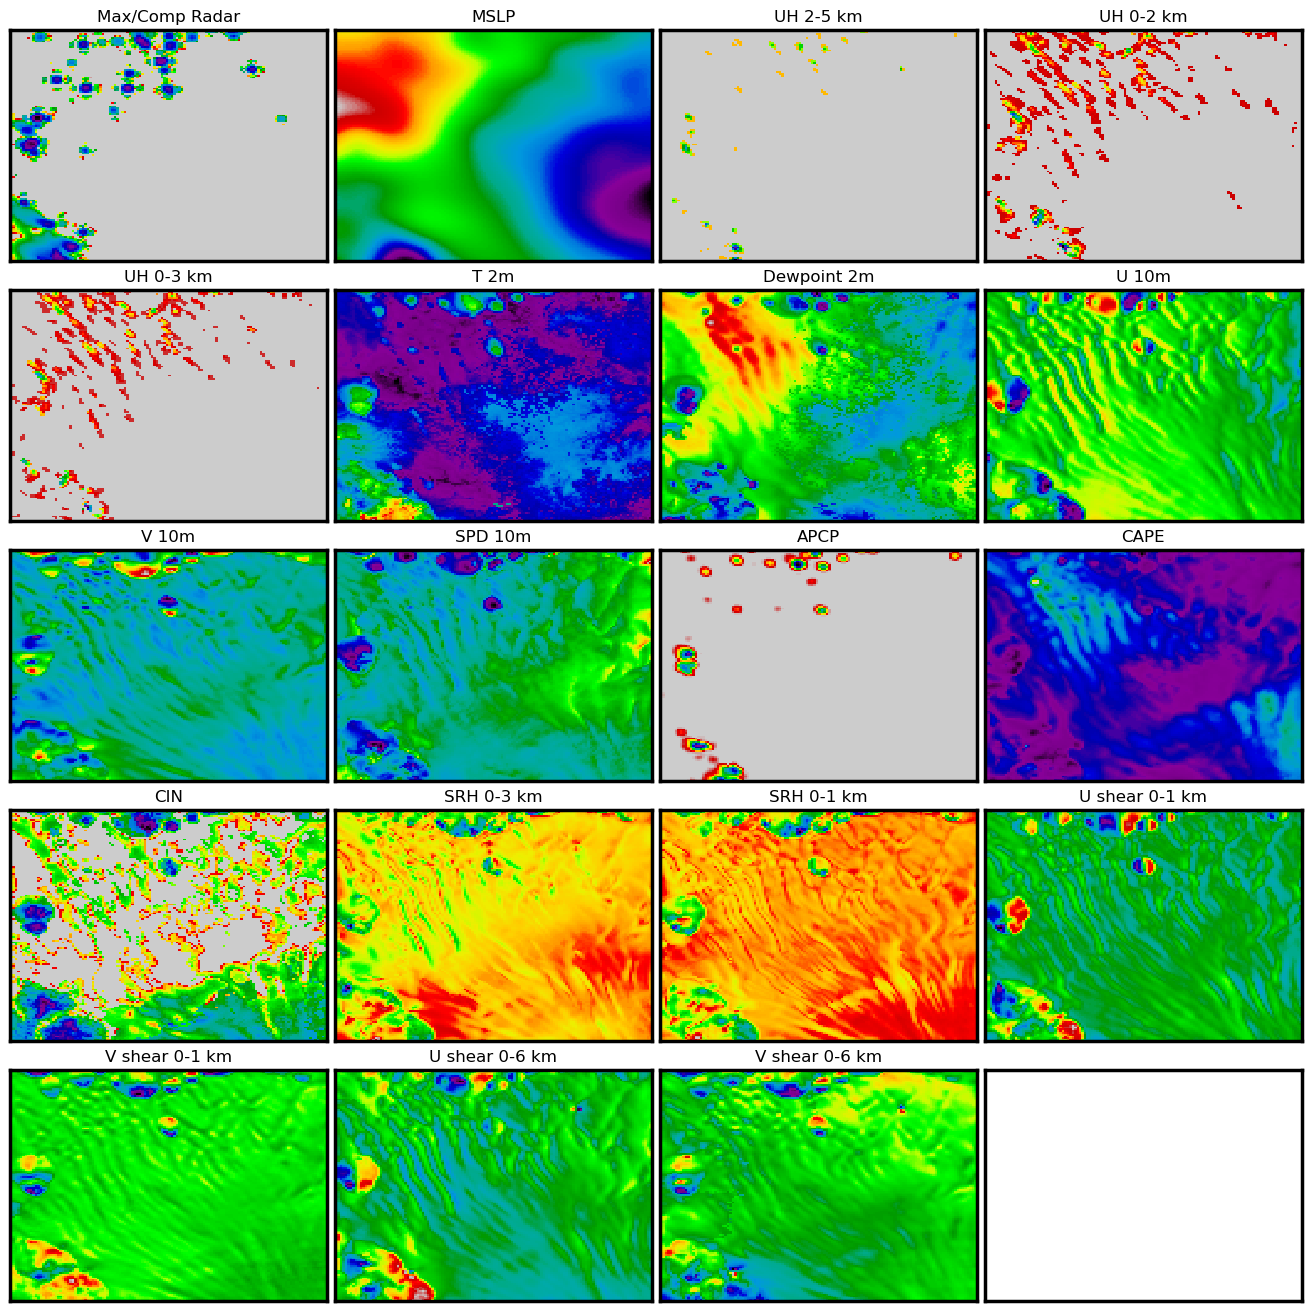

In [15]:
i = 0

data = np.load(filenames[i])

data = data[..., :19]

fig, AX = plt.subplots(5, 4, figsize=(13, 13), constrained_layout=True)
AX = AX.ravel()
for i, ax in enumerate(AX):
    ax = gu.ax_decorate_box(ax)
    try:
        ax.pcolormesh(data[0, ..., i], cmap=plt.cm.nipy_spectral_r)
        ax.set_title(name_pick[i])
    except:
        continue

### pos example

In [10]:
filenames = sorted(glob("/glade/scratch/ksha/DATA/NCAR_batch/*pos*.npy"))

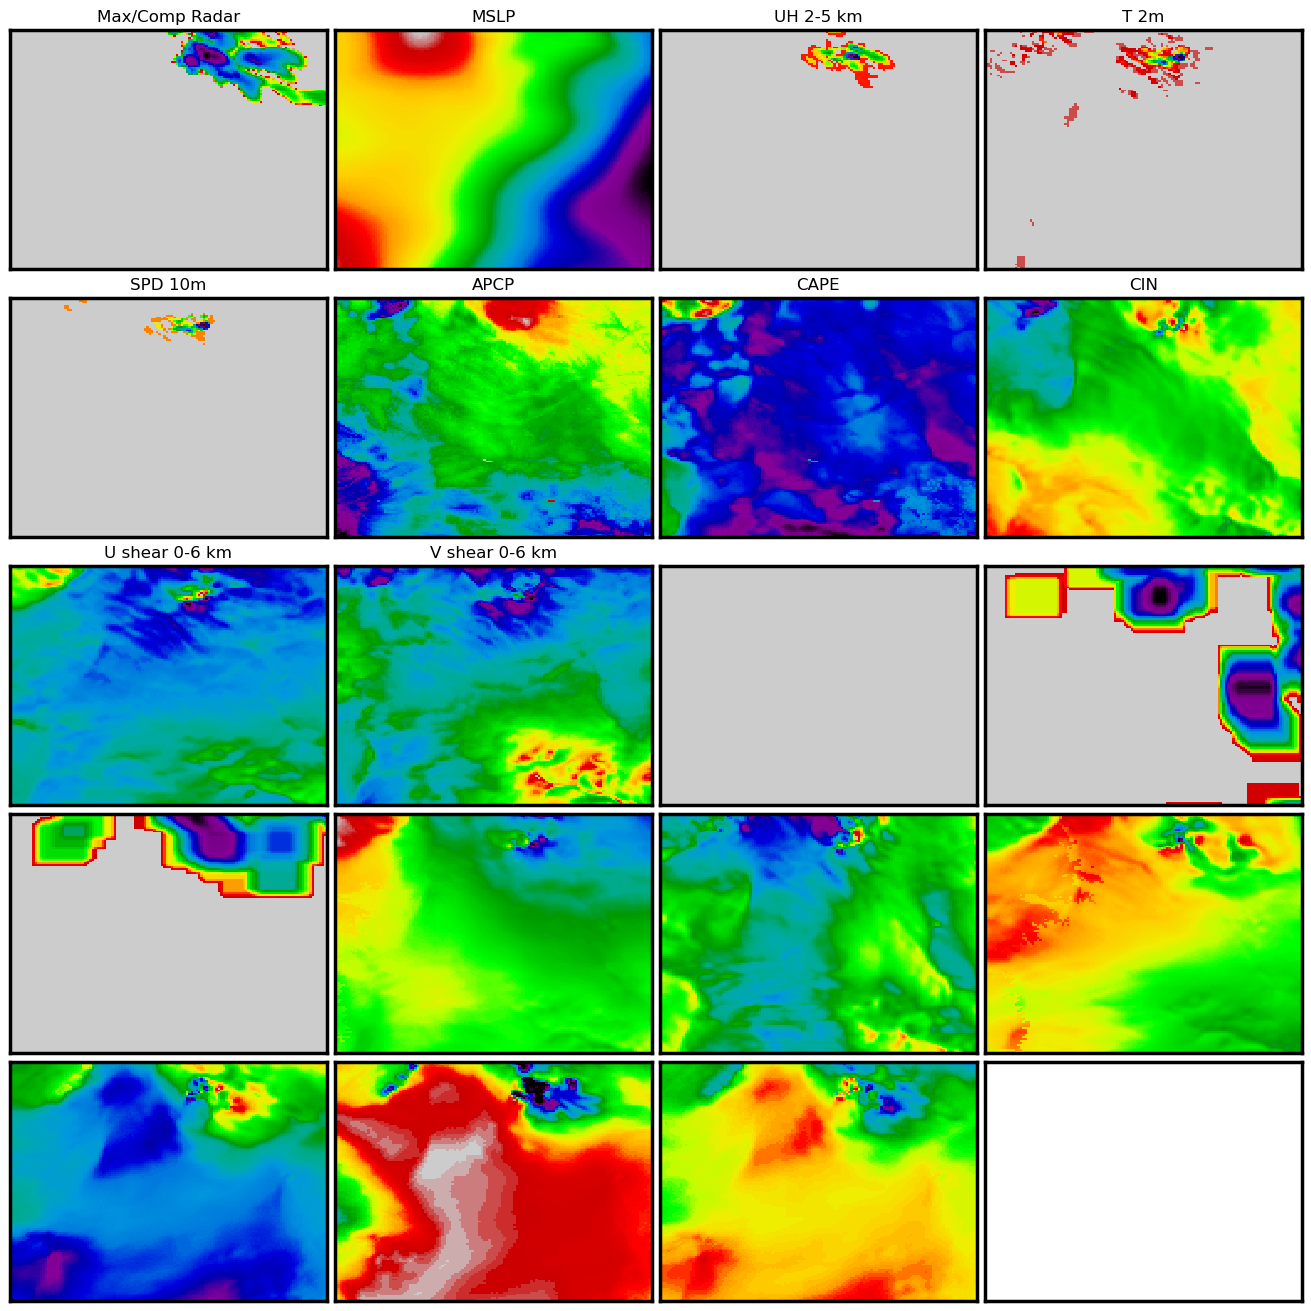

In [11]:
i = 100
data = np.load(filenames[i])

fig, AX = plt.subplots(5, 4, figsize=(13, 13), constrained_layout=True)
AX = AX.ravel()
for i, ax in enumerate(AX):
    ax = gu.ax_decorate_box(ax)
    try:
        ax.pcolormesh(data[0, ..., i], cmap=plt.cm.nipy_spectral_r)
        ax.set_title(name_pick[i])
    except:
        continue

### Wind report example

In [46]:
filenames = sorted(glob("/glade/scratch/ksha/DATA/NCAR_batch_neg/*wind*.npy"))

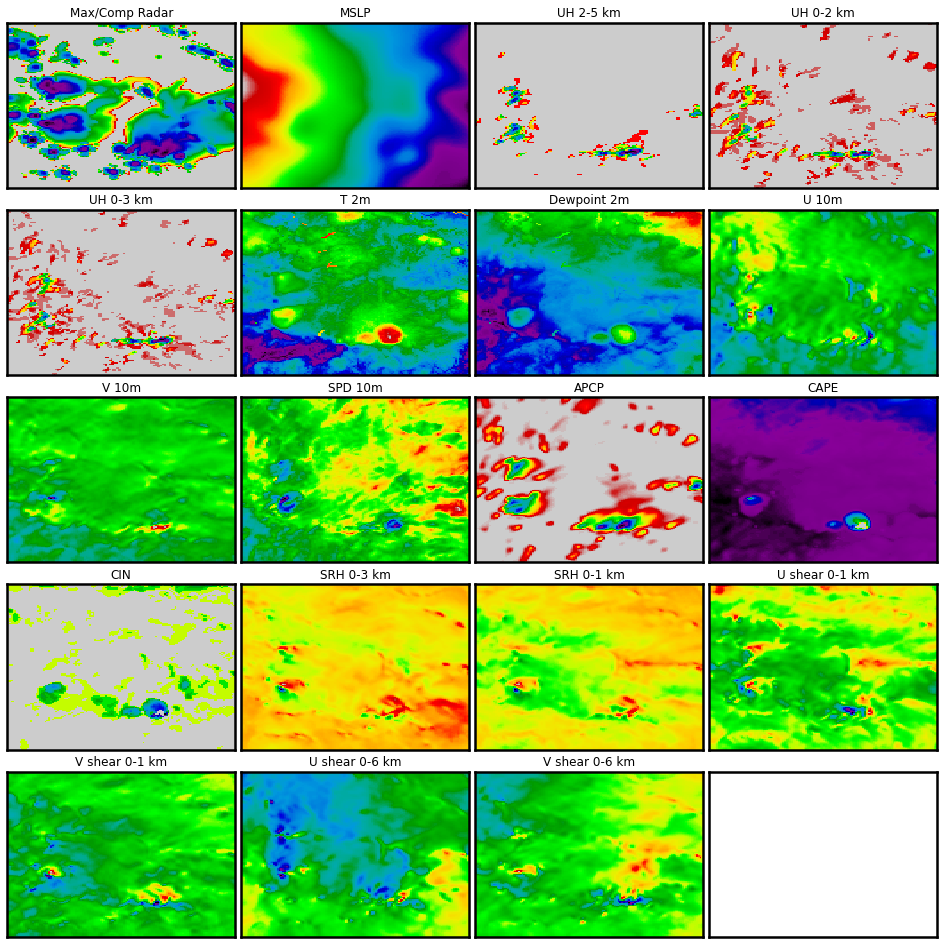

In [48]:
i = 100
data = np.load(filenames[i])

fig, AX = plt.subplots(5, 4, figsize=(13, 13), constrained_layout=True)
AX = AX.ravel()
for i, ax in enumerate(AX):
    ax = gu.ax_decorate_box(ax)
    try:
        ax.pcolormesh(data[0, ..., i], cmap=plt.cm.nipy_spectral_r)
        ax.set_title(name_pick[i])
    except:
        continue

### Hail report example

In [50]:
filenames = sorted(glob("/glade/scratch/ksha/DATA/NCAR_batch_neg/*hail*.npy"))

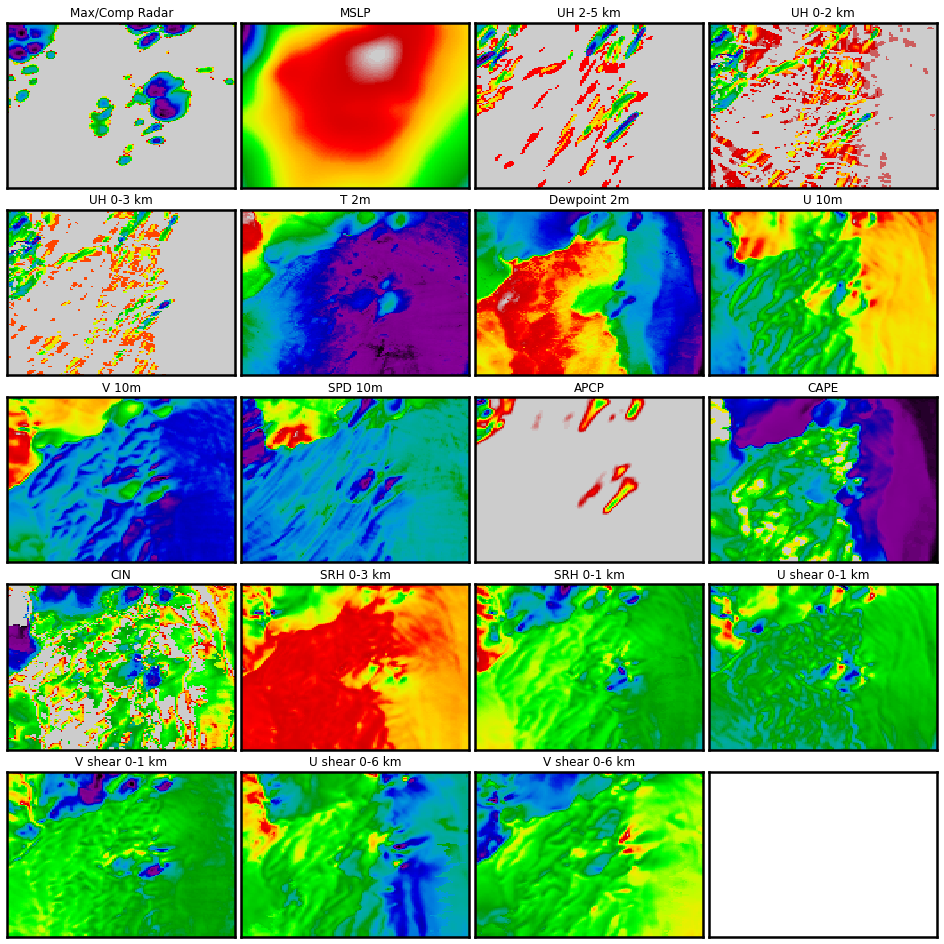

In [51]:
i = 100
data = np.load(filenames[i])

fig, AX = plt.subplots(5, 4, figsize=(13, 13), constrained_layout=True)
AX = AX.ravel()
for i, ax in enumerate(AX):
    ax = gu.ax_decorate_box(ax)
    try:
        ax.pcolormesh(data[0, ..., i], cmap=plt.cm.nipy_spectral_r)
        ax.set_title(name_pick[i])
    except:
        continue

### Validation set check

In [55]:
with h5py.File(save_dir_scratch+'VALID_real_lead{}.hdf'.format(21), 'r') as h5io:
    TEST_input = h5io['TEST_input'][...]
    TEST_target = h5io['TEST_target'][...]

In [53]:
TEST_target.shape

(32292,)

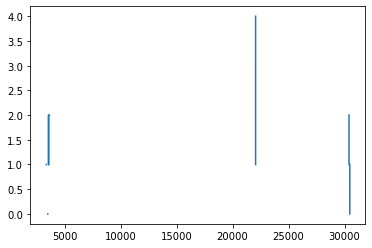

In [54]:
plt.plot(TEST_target)